# Feature Selection

**Feature selection** can be an important part of model selection. In supervised learning, including features in a model which do not provide information on the label is useless at best and may prevent generalization at worst.

Feature selection can involve application of several methods. Two important methods include:
1. Eliminating features with **low variance** and **zero variance**. Zero variance features are comprised of the same values. Low variance features arrise from features with most values the same and with few unique values. One way low variance features can arise, is from dummy variables for categories with very few members. The dummy variable will be mostly 0s with very few 1s. 
2. Training machine learning models with features that are **uninformative** can create a variety of problems. An uniformative featue does not significantly improve model performance. In many cases, the noise in the uniformative features will increase the variance of the model predictions. In other words, uniformative models are likely to reduce the ability of the machine learning model to generalize.   

****
**Note:** the second case of feature selection involves applying a selection statistic or hypothesis test multiple times. For large number of features, this process is very likely to lead to false positive and false negative results. This likely outcome is known as the **multiple comparisions problem** in statitics.

To understand this problem, consider the decision to keep a feature in a model as a hypothesis test. Any hypothesis test has some probability of both a false positive result and a false negative result. Consider a case where there are 40 uninformative features which are excluded from the model with 95% confidence. There will be an approximately 5% chance of accepting a featuree which should be rejected. In this case we would expect about 2 uniformative features to be accepted because of these errors. 

You may well ask, if testing features for importance can fail with large numbers of features, what is the alternative? The most general and scalable alternative is to use regularization methods. Consider applying regularization methods to a linear model. In this case, machine learning algorithm learns which features should be weighted highly and which should not. 
****

## Load the dataset

You will now apply the aformentioned principles to the bank credit data set. 

As a first step, run the code in the cell below to load the required packages. 

In [1]:
## Import packages
library(ggplot2)
library(repr)
library(dplyr)
library(caret)
library(MASS)

options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



Next, load the preprocessed files containing the features and the labels. The preprocessing includes the following:
1. Clean missing values.
2. Aggregate categories of certain categorical variables. 

Execute the code in the cell below to load the data frame and remove some unneeded columns. 

In [2]:
credit = read.csv('German_Credit_Preped.csv')
credit[,'X'] = NULL
credit[,'Customer_ID'] = NULL
dim(credit)
names(credit)

[1] 999  21

[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "purpose"                 
 [5] "loan_amount"              "savings_account_balance" 
 [7] "time_employed_yrs"        "payment_pcnt_income"     
 [9] "gender_status"            "other_signators"         
[11] "time_in_residence"        "property"                
[13] "age_yrs"                  "other_credit_outstanding"
[15] "home_ownership"           "number_loans"            
[17] "job_category"             "dependents"              
[19] "telephone"                "foreign_worker"          
[21] "bad_credit"

## Scale numeric features

Cross validation is used in this notebook. Therefore, the code in the cell below scales the numeric features in batch, before any splits. This is done to simplify the processing for the CV folds. Execute this code. 

In [3]:
num_cols = c('loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'age_yrs', 'number_loans', 'dependents')
preProcValues <- preProcess(credit[,num_cols], method = c("center", "scale"))
credit[,num_cols] = predict(preProcValues, credit[,num_cols])

## Eliminate low variance features

As a fist step in selecting features from this dataset you will remove features with low vaiance. The `VarianceThreshold` functon from the Scikit Learn `feature_selection` package identifies features with less than some threshold of unique values. Fo a probability that a feature is unique $p$ the threshold is specified as;

$$Var(x) = p(1-p)$$

In this case a 80%, or $p=0.8$, threshold is used. 

The `fit_transform` method applies the threshold to the variance of each feature and removes features with variance below the threshold. The `get_support_` attribute shows the `True` and `False` logical for inclusion of each feature. 

Execute the code and examine the result. 

The number of features has been reduced from 35 to 18. Apparently, there are 17 low variance features in the original array. 

In [4]:
dummies = dummyVars(bad_credit ~ ., data = credit)
credit_dummies = predict(dummies, newdata = credit)
head(credit_dummies)
names(data.frame(credit_dummies))

,checking_account_status.< 0 DM,checking_account_status.> 200 DM or salary assignment,checking_account_status.0 - 200 DM,checking_account_status.none,loan_duration_mo,credit_history.all loans at bank paid,credit_history.critical account - other non-bank loans,credit_history.current loans paid,credit_history.no credit - paid,credit_history.past payment delays,...,number_loans,job_category.highly skilled,job_category.skilled,job_category.unemployed-unskilled-non-resident,job_category.unskilled-resident,dependents,telephone.none,telephone.yes,foreign_worker.no,foreign_worker.yes
1,0,0,1,0,2.2464282,0,0,1,0,0,...,-0.7035652,0,1,0,0,-0.4283287,1,0,0,1
2,0,0,0,1,-0.7397312,0,1,0,0,0,...,-0.7035652,0,0,0,1,2.3323187,1,0,0,1
3,1,0,0,0,1.7487350,0,0,1,0,0,...,-0.7035652,0,1,0,0,2.3323187,1,0,0,1
4,1,0,0,0,0.2556552,0,0,0,0,1,...,1.0276211,0,1,0,0,2.3323187,1,0,0,1
5,0,0,0,1,1.2510417,0,0,1,0,0,...,-0.7035652,0,0,0,1,2.3323187,0,1,0,1
6,0,0,0,1,0.2556552,0,0,1,0,0,...,-0.7035652,0,1,0,0,-0.4283287,1,0,0,1


[1] "checking_account_status...0.DM"                        
 [2] "checking_account_status...200.DM.or.salary.assignment" 
 [3] "checking_account_status.0...200.DM"                    
 [4] "checking_account_status.none"                          
 [5] "loan_duration_mo"                                      
 [6] "credit_history.all.loans.at.bank.paid"                 
 [7] "credit_history.critical.account...other.non.bank.loans"
 [8] "credit_history.current.loans.paid"                     
 [9] "credit_history.no.credit...paid"                       
[10] "credit_history.past.payment.delays"                    
[11] "purpose.business"                                      
[12] "purpose.car..new."                                     
[13] "purpose.car..used."                                    
[14] "purpose.domestic.appliances"                           
[15] "purpose.education"                                     
[16] "purpose.furniture.equipment"                           
[17] "purpose.other"                                         
[18] "purpose.radio.television"                              
[19] "purpose.repairs"                                       
[20] "purpose.retraining"                                    
[21] "loan_amount"                                           
[22] "savings_account_balance...100.DM"                      
[23] "savings_account_balance....1000.DM"                    
[24] "savings_account_balance.100...500.DM"                  
[25] "savings_account_balance.500...1000.DM"                 
[26] "savings_account_balance.unknown.none"                  
[27] "time_employed_yrs...1.year"                            
[28] "time_employed_yrs....7.years"                          
[29] "time_employed_yrs.1...4.years"                         
[30] "time_employed_yrs.4...7.years"                         
[31] "time_employed_yrs.unemployed"                          
[32] "payment_pcnt_income"                                   
[33] "gender_status.female.divorced.separated.married"       
[34] "gender_status.male.divorced.separated"                 
[35] "gender_status.male.married.widowed"                    
[36] "gender_status.male.single"                             
[37] "other_signators.co.applicant"                          
[38] "other_signators.guarantor"                             
[39] "other_signators.none"                                  
[40] "time_in_residence"                                     
[41] "property.building.society.savings.life.insurance"      
[42] "property.car.or.other"                                 
[43] "property.real.estate"                                  
[44] "property.unknown.none"                                 
[45] "age_yrs"                                               
[46] "other_credit_outstanding.bank"                         
[47] "other_credit_outstanding.none"                         
[48] "other_credit_outstanding.stores"                       
[49] "home_ownership.for.free"                               
[50] "home_ownership.own"                                    
[51] "home_ownership.rent"                                   
[52] "number_loans"                                          
[53] "job_category.highly.skilled"                           
[54] "job_category.skilled"                                  
[55] "job_category.unemployed.unskilled.non.resident"        
[56] "job_category.unskilled.resident"                       
[57] "dependents"                                            
[58] "telephone.none"                                        
[59] "telephone.yes"                                         
[60] "foreign_worker.no"                                     
[61] "foreign_worker.yes"

In [5]:
near_zero = nearZeroVar(credit_dummies, freqCut = 95/5, uniqueCut = 10, saveMetrics = TRUE)
near_zero[(near_zero$zeroVar == TRUE) | (near_zero$nzv == TRUE), ]

,freqRatio,percentUnique,zeroVar,nzv
credit_history.all loans at bank paid,19.38776,0.2002002,FALSE,TRUE
credit_history.no credit - paid,23.97500,0.2002002,FALSE,TRUE
purpose.domestic appliances,82.25000,0.2002002,FALSE,TRUE
purpose.other,82.25000,0.2002002,FALSE,TRUE
purpose.repairs,44.40909,0.2002002,FALSE,TRUE
purpose.retraining,110.00000,0.2002002,FALSE,TRUE
savings_account_balance.>= 1000 DM,19.81250,0.2002002,FALSE,TRUE
other_signators.co-applicant,23.36585,0.2002002,FALSE,TRUE
other_credit_outstanding.stores,20.25532,0.2002002,FALSE,TRUE
job_category.unemployed-unskilled-non-resident,44.40909,0.2002002,FALSE,TRUE


In [ ]:
credit[,'foreign_worker'] = NULL
credit[,'purpose'] = NULL
credit[,'other_signators'] = NULL
str(credit)

## Select k best features

The low variance features have been eliminated. But, the question remains, are all these features informative? There are a number of methods used to determine the importance of features. Many machine learning models have specialized methods to determine feature importance specifically indended for those methods. 

In this example, you will use a fairly general and robust method using cross validation. The algorithm is straight forward. Features are recursively removed.  Cross validation is used to find the change in model performance, if any, to determine if a feature should be deleted altogether. 

The code in the cell below performs the following processing:
1. Create the folds for the cross validation for feature selection. These folds should be independent of any other cross validation performed. 
2. The logistic regression model is defined. 
3. The `RFECV` funcion from the Scikit Learn `feature_selection` package is used to determine which features to retain using a cross validation method. Notice that AUC is used as the model selection metric as the labels are imbalanced. In this case, the default, accuracy is a poor choice. 
4. The RFECV feature selector is fit to the data. 

Execute this code and examine the results.

In [6]:
dummies = dummyVars(bad_credit ~ ., data = credit)
credit_dummies = predict(dummies, newdata = credit)
head(credit_dummies)
names(data.frame(credit_dummies))

,checking_account_status.< 0 DM,checking_account_status.> 200 DM or salary assignment,checking_account_status.0 - 200 DM,checking_account_status.none,loan_duration_mo,credit_history.all loans at bank paid,credit_history.critical account - other non-bank loans,credit_history.current loans paid,credit_history.no credit - paid,credit_history.past payment delays,...,number_loans,job_category.highly skilled,job_category.skilled,job_category.unemployed-unskilled-non-resident,job_category.unskilled-resident,dependents,telephone.none,telephone.yes,foreign_worker.no,foreign_worker.yes
1,0,0,1,0,2.2464282,0,0,1,0,0,...,-0.7035652,0,1,0,0,-0.4283287,1,0,0,1
2,0,0,0,1,-0.7397312,0,1,0,0,0,...,-0.7035652,0,0,0,1,2.3323187,1,0,0,1
3,1,0,0,0,1.7487350,0,0,1,0,0,...,-0.7035652,0,1,0,0,2.3323187,1,0,0,1
4,1,0,0,0,0.2556552,0,0,0,0,1,...,1.0276211,0,1,0,0,2.3323187,1,0,0,1
5,0,0,0,1,1.2510417,0,0,1,0,0,...,-0.7035652,0,0,0,1,2.3323187,0,1,0,1
6,0,0,0,1,0.2556552,0,0,1,0,0,...,-0.7035652,0,1,0,0,-0.4283287,1,0,0,1


[1] "checking_account_status...0.DM"                        
 [2] "checking_account_status...200.DM.or.salary.assignment" 
 [3] "checking_account_status.0...200.DM"                    
 [4] "checking_account_status.none"                          
 [5] "loan_duration_mo"                                      
 [6] "credit_history.all.loans.at.bank.paid"                 
 [7] "credit_history.critical.account...other.non.bank.loans"
 [8] "credit_history.current.loans.paid"                     
 [9] "credit_history.no.credit...paid"                       
[10] "credit_history.past.payment.delays"                    
[11] "purpose.business"                                      
[12] "purpose.car..new."                                     
[13] "purpose.car..used."                                    
[14] "purpose.domestic.appliances"                           
[15] "purpose.education"                                     
[16] "purpose.furniture.equipment"                           
[17] "purpose.other"                                         
[18] "purpose.radio.television"                              
[19] "purpose.repairs"                                       
[20] "purpose.retraining"                                    
[21] "loan_amount"                                           
[22] "savings_account_balance...100.DM"                      
[23] "savings_account_balance....1000.DM"                    
[24] "savings_account_balance.100...500.DM"                  
[25] "savings_account_balance.500...1000.DM"                 
[26] "savings_account_balance.unknown.none"                  
[27] "time_employed_yrs...1.year"                            
[28] "time_employed_yrs....7.years"                          
[29] "time_employed_yrs.1...4.years"                         
[30] "time_employed_yrs.4...7.years"                         
[31] "time_employed_yrs.unemployed"                          
[32] "payment_pcnt_income"                                   
[33] "gender_status.female.divorced.separated.married"       
[34] "gender_status.male.divorced.separated"                 
[35] "gender_status.male.married.widowed"                    
[36] "gender_status.male.single"                             
[37] "other_signators.co.applicant"                          
[38] "other_signators.guarantor"                             
[39] "other_signators.none"                                  
[40] "time_in_residence"                                     
[41] "property.building.society.savings.life.insurance"      
[42] "property.car.or.other"                                 
[43] "property.real.estate"                                  
[44] "property.unknown.none"                                 
[45] "age_yrs"                                               
[46] "other_credit_outstanding.bank"                         
[47] "other_credit_outstanding.none"                         
[48] "other_credit_outstanding.stores"                       
[49] "home_ownership.for.free"                               
[50] "home_ownership.own"                                    
[51] "home_ownership.rent"                                   
[52] "number_loans"                                          
[53] "job_category.highly.skilled"                           
[54] "job_category.skilled"                                  
[55] "job_category.unemployed.unskilled.non.resident"        
[56] "job_category.unskilled.resident"                       
[57] "dependents"                                            
[58] "telephone.none"                                        
[59] "telephone.yes"                                         
[60] "foreign_worker.no"                                     
[61] "foreign_worker.yes"

In [7]:
set.seed(9999)
bad_credit_factor = as.factor(credit[,'bad_credit'])

recallSummary = function (data, lev = NULL, model = NULL) {
                    out = recall(data$obs, data$pred)  
                    names(out) <- "recall"
                    out
}

fitControl = trainControl(method = 'CV',
                         number = 10,
                         repeats = 1,
                         summaryFunction = recallSummary)

#trGrid <-  expand.grid(alpha = c(0.2, 0.5, 0.75, 1.0), 
#                       lambda = c(0.05, 0.1, 0.2, 0.3))

set.seed(9999)
cv_mod = train(x = credit_dummies, y = bad_credit_factor,
                 metric = "recall", 
                 method = "glmnet", 
                 trControl = fitControl,
 #                tuneGrid = trGrid,
                 weights = ifelse(credit$bad_credit == 1, 0.66, 0.34))
cv_mod

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



glmnet 

999 samples
 62 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 899, 899, 899, 900, 899, 899, ... 
Resampling results across tuning parameters:

  alpha  lambda       recall   
  0.10   0.000296246  0.8383618
  0.10   0.002962460  0.8386502
  0.10   0.029624601  0.8417908
  0.55   0.000296246  0.8370561
  0.55   0.002962460  0.8379903
  0.55   0.029624601  0.8418636
  1.00   0.000296246  0.8372905
  1.00   0.002962460  0.8400005
  1.00   0.029624601  0.8385708

recall was used to select the optimal model using  the largest value.
The final values used for the model were alpha = 0.55 and lambda = 0.0296246.

In [8]:
var_imp = varImp(cv_mod)
var_imp

glmnet variable importance

  only 20 most important variables shown (out of 61)

                                                       Overall
checking_account_status.none                            100.00
purpose.car (used)                                       55.44
credit_history.critical account - other non-bank loans   44.97
credit_history.no credit - paid                          41.79
other_signators.guarantor                                41.71
checking_account_status.< 0 DM                           37.38
credit_history.all loans at bank paid                    36.49
purpose.car (new)                                        35.96
other_credit_outstanding.none                            34.15
foreign_worker.no                                        33.20
foreign_worker.yes                                       30.74
purpose.education                                        30.49
time_employed_yrs.4 - 7 years                            28.92
loan_duration_mo                    

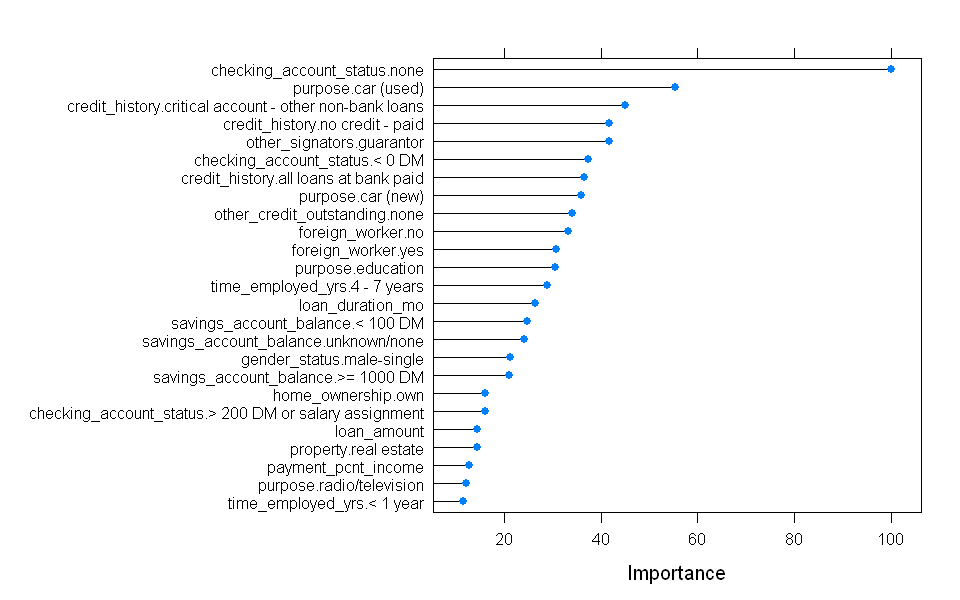

In [9]:
options(repr.plot.width=8, repr.plot.height=5)
plot(var_imp, top = 25)

In [10]:
var_imp$importance$Imp = (var_imp$importance$Overall > 4.0)
var_imp$importance[var_imp$importance$Imp == TRUE,]
row.names(var_imp$importance[var_imp$importance$Imp == TRUE,])

,Overall,Imp
checking_account_status.< 0 DM,37.384025,TRUE
checking_account_status.> 200 DM or salary assignment,16.094658,TRUE
checking_account_status.none,100.000000,TRUE
loan_duration_mo,26.519533,TRUE
credit_history.all loans at bank paid,36.493870,TRUE
credit_history.critical account - other non-bank loans,44.974744,TRUE
credit_history.no credit - paid,41.788289,TRUE
purpose.car (new),35.959499,TRUE
purpose.car (used),55.443373,TRUE
purpose.education,30.492977,TRUE


[1] "checking_account_status.< 0 DM"                        
 [2] "checking_account_status.> 200 DM or salary assignment" 
 [3] "checking_account_status.none"                          
 [4] "loan_duration_mo"                                      
 [5] "credit_history.all loans at bank paid"                 
 [6] "credit_history.critical account - other non-bank loans"
 [7] "credit_history.no credit - paid"                       
 [8] "purpose.car (new)"                                     
 [9] "purpose.car (used)"                                    
[10] "purpose.education"                                     
[11] "purpose.radio/television"                              
[12] "loan_amount"                                           
[13] "savings_account_balance.< 100 DM"                      
[14] "savings_account_balance.>= 1000 DM"                    
[15] "savings_account_balance.unknown/none"                  
[16] "time_employed_yrs.< 1 year"                            
[17] "time_employed_yrs.4 - 7 years"                         
[18] "payment_pcnt_income"                                   
[19] "gender_status.male-single"                             
[20] "other_signators.co-applicant"                          
[21] "other_signators.guarantor"                             
[22] "property.real estate"                                  
[23] "property.unknown-none"                                 
[24] "age_yrs"                                               
[25] "other_credit_outstanding.none"                         
[26] "home_ownership.own"                                    
[27] "home_ownership.rent"                                   
[28] "foreign_worker.no"                                     
[29] "foreign_worker.yes"

In [11]:
credit_dummies_df = data.frame(credit_dummies)
credit_dummies_df = credit_dummies_df[,c('checking_account_status...200.DM.or.salary.assignment',
                                   'checking_account_status.0...200.DM',
                                   'checking_account_status.none',
                                   'loan_duration_mo',
                                   'credit_history.critical.account...other.non.bank.loans',
                                   'credit_history.current.loans.paid',
                                   'credit_history.no.credit...paid',
                                   'credit_history.past.payment.delays',
                                   'loan_amount',
                                   'savings_account_balance.100...500.DM',
                                   'savings_account_balance.unknown.none',
                                   'time_employed_yrs....7.years',
                                   'time_employed_yrs.1...4.years',
                                   'time_employed_yrs.4...7.years',
                                   'time_employed_yrs.unemployed',
                                   'payment_pcnt_income',
                                   'gender_status.male.married.widowed',
                                   'gender_status.male.single',
                                   'time_in_residence',
                                   'property.car.or.other',
                                   'property.real.estate',
                                   'property.unknown.none',
                                   'age_yrs',
                                   'other_credit_outstanding.none',
                                   'home_ownership.own',
                                   'home_ownership.rent',
                                   'number_loans',
                                   'job_category.skilled',  
                                   'job_category.unskilled.resident',
                                   'dependents',
                                   'telephone.yes')]

set.seed(9999)

recallSummary = function (data, lev = NULL, model = NULL) {
                    out = recall(data$obs, data$pred)  
                    names(out) <- "recall"
                    out
}

fitControl = trainControl(method = 'repeatedcv',
                         number = 10,
                         repeats = 5,
                         summaryFunction = recallSummary)

trGrid <-  expand.grid(alpha = c(0.2, 0.5, 0.75, 1.0), 
                       lambda = c(0.05, 0.1, 0.2, 0.3))

set.seed(9999)
cv_mod = train(x = credit_dummies_df, y = as.factor(credit[,'bad_credit']), 
                 method = "glmnet", 
                 metric = "recall",
                 trControl = fitControl,
                 tuneGrid = trGrid,
                 weights = ifelse(credit[,'bad_credit'] == 1, 0.66, 0.34))
    
cv_mod

glmnet 

999 samples
 32 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 899, 899, 899, 900, 899, 899, ... 
Resampling results across tuning parameters:

  alpha  lambda  recall   
  0.20   0.05    0.8288361
  0.20   0.10    0.8255027
  0.20   0.20    0.8042836
  0.20   0.30    0.7747844
  0.50   0.05    0.8342513
  0.50   0.10    0.8272711
  0.50   0.20    0.7276858
  0.50   0.30    0.6996970
  0.75   0.05    0.8372426
  0.75   0.10    0.8362149
  0.75   0.20    0.6996970
  0.75   0.30    0.6996970
  1.00   0.05    0.8437573
  1.00   0.10    0.8621558
  1.00   0.20    0.6996970
  1.00   0.30    0.6996970

recall was used to select the optimal model using  the largest value.
The final values used for the model were alpha = 1 and lambda = 0.1.

From the support you can see that some features are selected (True) and eliminated (False). 

Execute the code below to see the relative ranking of the features.

Notice that the features which have been selected are shown with a rank of 1. The features eliminated are shown with higher numbers. 

The code in the cell below as uses the `transform` method applies the selector to the feature array. 

In [ ]:
str(credit_dummies)

In [ ]:
library(ROCR)

## Add the label to the data frame
credit_dummies_df[,'bad_credit'] = bad_credit

set.seed(1955)

score_model = function(df, threshold){
    df$score = ifelse(df$probs > threshold, 1, 0)
    df
}

binary.eval <- function(df, fold){ 
  # First step is to find the TP, FP, TN, FN cases
  df$conf = ifelse(df$bad_credit == 1 & df$score == 1, 'TP',
                    ifelse(df$bad_credit == 0 & df$score == 1, 'FP',
                           ifelse(df$bad_credit == 0 & df$score == 0, 'TN', 'FN')))

  # Elements of the confusion matrix
  TP = length(df[df$conf == 'TP', 'conf'])
  FP = length(df[df$conf == 'FP', 'conf'])
  TN = length(df[df$conf == 'TN', 'conf'])
  FN = length(df[df$conf == 'FN', 'conf'])
  
  ## Confusion matrix as data frame
  out = data.frame(Negative = c(TN, FN), Positive = c(FP, TP))
  row.names(out) = c('TrueNeg', 'TruePos')
    
  # Compute AUC with ROCR package
  pred_obj = prediction(df$probs, df$bad_credit)
  AUC = performance(pred_obj,"auc")@y.values[[1]]  
  
  # Compute and print metrics
  P = TP/(TP + FP)
  R = TP/(TP + FN)  
  F1 = 2*P*R/(P+R) 
  data.frame = data.frame(fold = as.character(fold),
                          accuracy = (TP + TN)/(TP + TN + FP + FN),
                          precision = P,
                          recall = R,
                          F1 = F1,
                          AUC = AUC)
 }


Create_Folds = function(df, folds){
    ## Create a vector of the fold assignments
    nrows = nrow(df)
    ncount = nrows/folds
    ## Concatenate vectors of fold number
    fold = rep(1, ncount)
    for(i in seq(2, folds, by = 1)){
        fold = c(fold, rep(i, ncount))
    }
    fold
}


Fit_Mod = function(training, test, weights){
    set.seed(5566)
    
    x_train = as.matrix(training[, names(training) != 'bad_credit'])
    y_train = as.matrix(training[, 'bad_credit'])
    x_test = as.matrix(test[, names(test) != 'bad_credit'])
    
    logistic_mod = glmnet(x_train, y_train, 
                          weights = weights,
                          alpha = 1.0,
                          lambda = 0.1,
                          family = 'binomial')
    test$probs = predict(logistic_mod, newx = x_test, type = 'response')
    test = score_model(test, 0.5)
    test
}

Cross_Validate_Mod = function(df, folds){
    ## Create a vector of the fold assignments
    fold = Create_Folds(df, folds)
    
    ## Randomly shuffle the rows of the data frame
    shuffle = sample(seq(1, nrow(df), by = 1))
    df = df[shuffle,]
    
    ## Loop over number of folds to fit and evaluate the model
    training = df[fold != 1,]
    test = df[fold == 1, ]
    test = Fit_Mod(training, test, 
                   weights = ifelse(training$bad_credit == 1, 0.66, 0.34))
    evals = binary.eval(test, 1)
    for(i in seq(2, folds, by = 1)){
        training = df[fold != i,]
        test = df[fold == i, ]
        test = Fit_Mod(training, test, 
                       weights = ifelse(training$bad_credit == 1, 0.66, 0.34))
        evals = rbind(evals, binary.eval(test, i))
    }
    
    ## Compute some summary statistics and append to the data rame
    evals = rbind(evals, data.frame(fold = 'Mean',
                          accuracy = mean(evals[,2]),
                          precision = mean(evals[,3]),
                          recall = mean(evals[,4]),
                          F1 = mean(evals[,5]),
                          AUC = mean(evals[,6])))
    
    evals = rbind(evals, data.frame(fold = 'std',
                          accuracy = sd(evals[,2]),
                          precision = sd(evals[,3]),
                          recall = sd(evals[,4]),
                          F1 = sd(evals[,5]),
                          AUC = sd(evals[,6])))
    evals
}

Cross_Validate_Mod(credit_dummies_df, 10)

The features have been reduced from the 18 high variance features to 15. Three features have been found to be unimportant. 

The code in the cell below creates a plot of AUC (the metric) vs. the number of features. Execute this code. 

Notice that the change in AUC is not that great across a range of features around the 15 selected. 

## Apply nested cross validation to create model

The next step is to use nested cross validation to optimize the model hyperparameter and test the model performance. The model is constructed using the features selected. 

As a first step, construct the inside and outside folds for the nested cross validaton by running the code in the cell below. 

The code in the cell below performs the grid search for the optimal model hyperparameter. As before, the scoring metric is AUC.   

The optimal value of the hyperparameter is 10. This parameter is larger than for the same model with all the features. Recalling that the parameter is the inverse of regularization strength, the smaller parameter means the model with fewer features requires less regularaization. 

To get a feel for the results of the cross validation execute the code in the cell below and observe the results. 

Notice that the mean AUCs are within 1 standard deviation of each other. The AUC for the hyperparameter value of 10 is not significantly better than the other values tested. 

Now you will perform the outer loop of the nested cross validation by executing the code in the cell below. 

The performance metric is not significanty different than for the inner loop of  the cross validation. 

## Test the model

With the features selected and the optimal hyperparameters estimated, it is time to test the model. the code in the cell below does the following processing;
1. Split the reduced feature subset of the data into training and test subsets.
2. Define and fit a model using the optimal hyperparameter. 

Execute this code.

Next, execute the code in the cell below to score the model and display a sample of the resulting probabilities. 

With the model scored, execute the code in the cell below to display performance metrics for the model.

At first glance, these performamce metrics look quite good. Notice however, that the AUC is much larger than achieved with cross validation. This indicates that these results are overly optimistic, a common situation when a single split is used to evaluate a model. 

## Summary

In this lab you have performed two types of feature selection:
1. Eliminating low variance featurers, which by their nature cannot be highly informative since they contain a high fraction of the same value.
2. Using recursive feature elimination, a cross validation technique for identifing uninformative features. 

With a reduced feature set less regulariztion was required for the model. This is expected since the most uninformative features have alredy been eliminated. It should be noted that for large numbers of features, these types of feature elimination algorithms should not be expected to give good generalization performance as a result of the multiple comparisons problem. In these cases, stronger regularization is a better approach. 